In [2]:
!python3 -m pip install --user finta

You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
import matplotlib.pyplot as plt


In [34]:
xx=df[np.logical_and(df["year"]==1397,df["month"]==5)]

<class 'pandas.core.series.Series'>


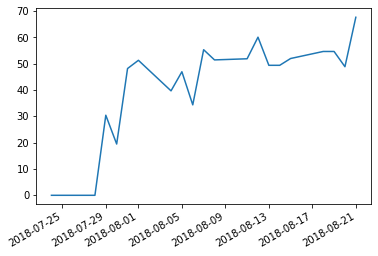

In [54]:
yy=TA.RSI(xx)
yy.plot()
print(type(yy))

In [3]:
from finta import TA

In [10]:
x=TA.BBANDS(df)

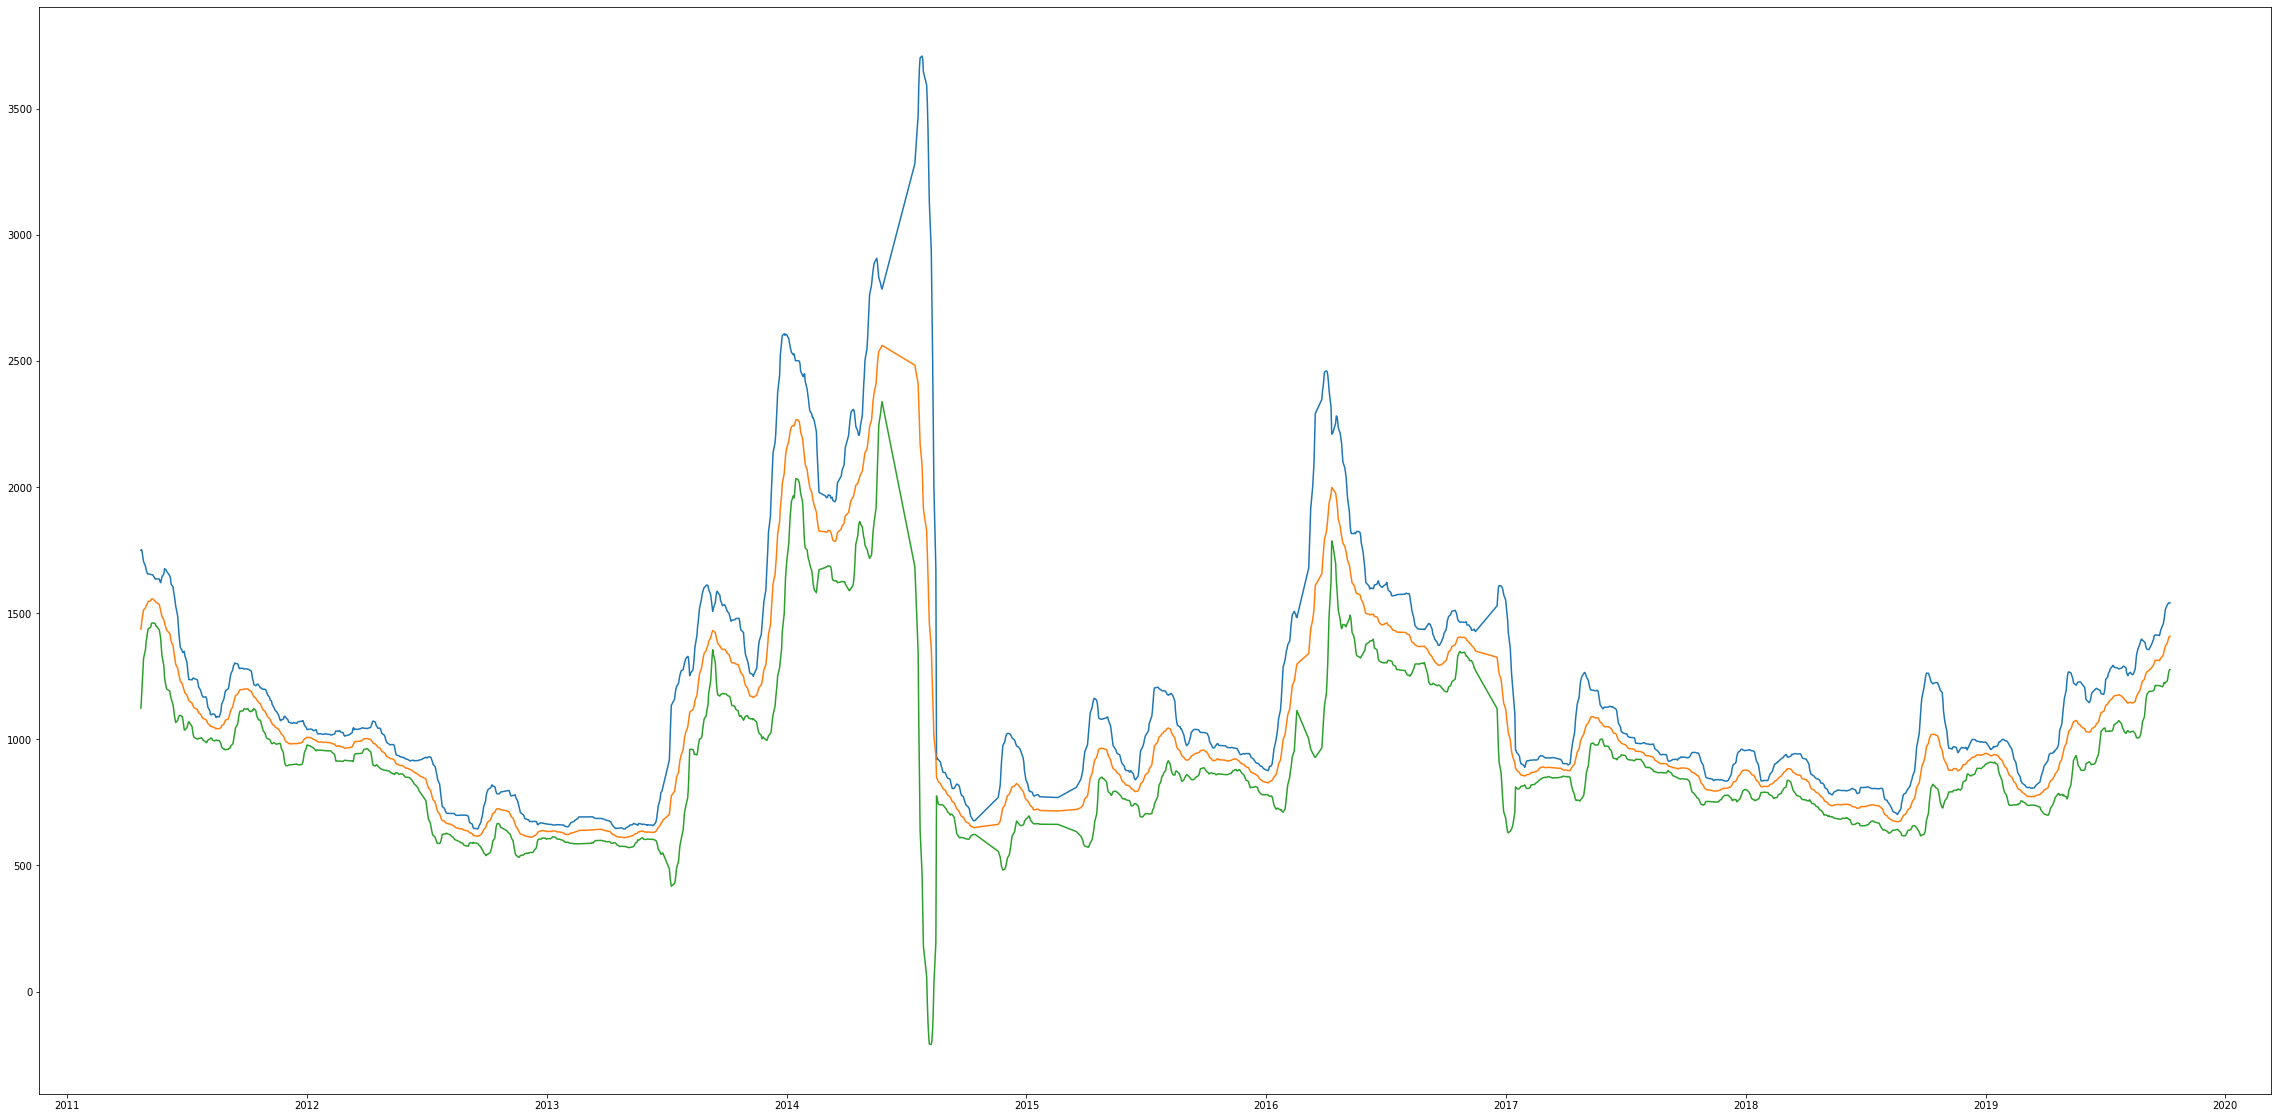

In [17]:
plt.figure(figsize=(40,20))
plt.plot(x)
plt.show()

In [4]:
# !pip3 install quandl
# !python3 -m pip install --user backtesting
# !python3 -m pip install --user pyalgotrade
# !python3 -m pip install --user Zipline
# !python3 -m pip install --user colorama
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
from math import pi
import quandl as qdl
from scipy.stats import linregress
from getpass import getpass
import models.data_provider as dp

In [8]:
dm = dp.DataModel("../xcels", ["master0.csv", "master1.csv"])
dm.read()

In [61]:
#this is mine 

from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG
    
df = dm.get(dm.TA_SYMBOLS[0], start="1390-01-01")
df.columns = ['symbol', 'name', 'amount', 'Volume', 'value', 'lastday', 'open',
       'close', 'last-change', 'last-percent', 'ending', 'ending-change',
       'ending-percent', 'min', 'max', 'year', 'month', 'day', 'diff_min_max',
       'diff_open', 'adj_scale', 'Open', 'Close', 'adj_ending',
       'Low', 'High', 'Open1', 'Close1', 'log_adj_ending',
       'Low1', 'High1']
df=df[df["year"]>1393]
class FirstStrategy(Strategy):
    n1=50
    n2=20
    
    def init(self):
        my_df=pd.DataFrame()
        my_df["close"]=self.data.Close.to_series()
        my_df["open"]=self.data.Open.to_series()
        my_df["high"]=self.data.High.to_series()
        my_df["low"]=self.data.Low.to_series()
        self.rsi_i = self.I(TA.RSI,my_df)
        print(self.rsi_i)
    
    def next(self):
        print(self.rsi_i)
        if crossover(self.rsi_i, 70):
            self.sell()
        elif crossover(70, self.rsi_i):
            self.buy()


bt = Backtest(df,FirstStrategy, cash=10000, commission=0.015)

output = bt.run()
bt.plot()

[         nan 100.         100.         ...  60.67961967  45.54934412
  44.4280884 ]
[ nan 100. 100.]
[         nan 100.         100.          53.64707397]
[         nan 100.         100.          53.64707397  55.86029973]
[         nan 100.         100.          53.64707397  55.86029973
  75.08064794]
[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727]
[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796]
[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007]
[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325]
[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073]
[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  8

  35.40446092  54.29096499  57.59251144  59.46913281  64.85296978]
[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.647348

  31.27465648  24.4283245 ]
[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.075502

  86.67419243  88.97227173  90.06192728]
[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.109012

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

  58.81326783  66.34463239  58.8895305   65.583112  ]
[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.366434

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

[         nan 100.         100.          53.64707397  55.86029973
  75.08064794  82.72633727  87.42046796  89.31111007  91.51760325
  78.48790073  71.35296608  61.65279831  55.44098978  45.55507781
  36.88253615  31.85342232  27.52313687  35.05302223  44.11658121
  42.62451085  38.97424642  31.67188228  36.11145469  34.39250885
  27.37573237  22.15925968  20.69660222  37.177164    27.26497807
  26.40094048  40.70972619  50.47316962  51.11376828  41.5111465
  39.83965211  44.163358    43.09133304  31.37457811  31.37457811
  29.25639256  26.19547553  26.19547553  34.5521489   37.52042126
  33.17963965  44.93963625  42.25796875  39.03292489  29.50593465
  21.72056814  39.48610808  49.72565234  52.38195157  45.85853094
  62.43694391  70.06247305  74.32972665  76.44301477  82.83071952
  86.22387633  73.92287099  69.67497358  57.16663404  62.36399641
  69.21989212  62.1306463   73.95562231  78.15961797  81.5142981
  82.64734813  86.3664342   88.10901293  71.07550252  60.44460799
  51.3638734

In [28]:
glob_rsi

[]